In [1]:
# Import libraries need for Linear Regression Model
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing Required libraries
import nltk
import re
import string
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
dt=pd.read_csv('spam.csv')

In [4]:
dt

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will �_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [5]:
#To display data details 
print(dt)
print ('*'*100)

print(dt.head(10))
print ('*'*100)
print(dt.tail(10))
print ('*'*100)

print('The shape of the train dataset',dt.shape)

        v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will �_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1           NaN        NaN  


In [6]:
#Analyzing dataset
print(dt.isna().sum())

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64


In [7]:
dt.shape

(5572, 5)

<AxesSubplot:>

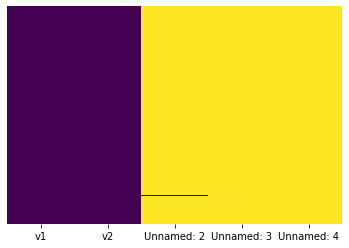

In [8]:
sns.heatmap(dt.isnull(), yticklabels = False, cbar = False, cmap ='viridis')

In [9]:
# Getting information on the dataset
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [10]:
# To find the data type of the dataset
for col in dt:
    print ('This column', col ,'has', dt[col].unique(),'unique elements')
    print ('*'*100)

This column v1 has ['ham' 'spam'] unique elements
****************************************************************************************************
This column v2 has ['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'
 'Ok lar... Joking wif u oni...'
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"
 ... 'Pity, * was in mood for that. So...any other suggestions?'
 "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free"
 'Rofl. Its true to its name'] unique elements
****************************************************************************************************
This column Unnamed: 2 has [nan ' PO Box 5249'
 ' the person is definitely special for u..... But if the person is so special'
 ' HOWU DOIN? FOUNDURSELF A JOBYET SAUSAGE?LOVE JEN XX

In [11]:
# To find the data type of the dataset
for col in dt:
    print ('This column', col ,'has', dt[col].nunique(),'unique elements')
    print ('*'*100)

This column v1 has 2 unique elements
****************************************************************************************************
This column v2 has 5169 unique elements
****************************************************************************************************
This column Unnamed: 2 has 43 unique elements
****************************************************************************************************
This column Unnamed: 3 has 10 unique elements
****************************************************************************************************
This column Unnamed: 4 has 5 unique elements
****************************************************************************************************


In [12]:
dt.describe(include='all')

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


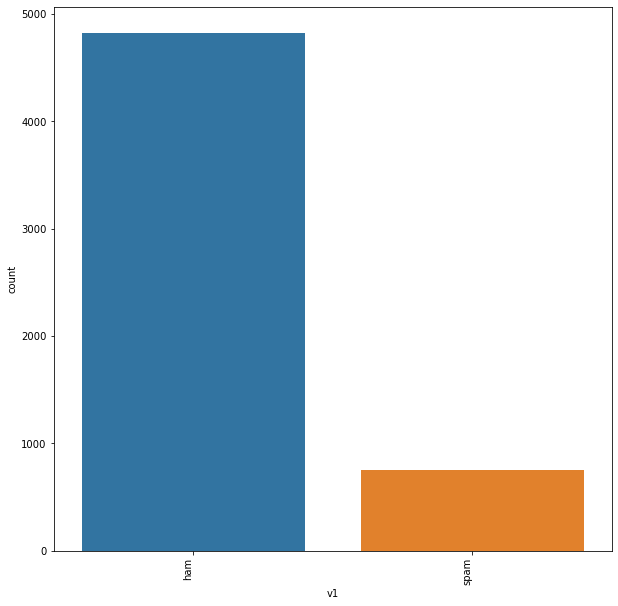

In [13]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(dt['v1'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

In [14]:
(dt['v1'].value_counts()/dt.shape[0])*100

ham     86.593683
spam    13.406317
Name: v1, dtype: float64

In [15]:
dt.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [16]:
dt.shape[0]

5572

In [17]:
(dt.isna().sum()/dt.shape[0])*100

v1             0.000000
v2             0.000000
Unnamed: 2    99.102656
Unnamed: 3    99.784637
Unnamed: 4    99.892319
dtype: float64

In [18]:
index=np.where((dt['Unnamed: 2'].isna()==False)&(dt['Unnamed: 3'].isna()==False)&(dt['Unnamed: 4'].isna()==False))

In [19]:
dt.loc[index]

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
281,ham,\Wen u miss someone,the person is definitely special for u..... B...,why to miss them,"just Keep-in-touch\"" gdeve.."""
1038,ham,"Edison has rightly said, \A fool can ask more ...",GN,GE,"GNT:-)"""
2255,ham,I just lov this line: \Hurt me with the truth,I don't mind,i wil tolerat.bcs ur my someone..... But,"Never comfort me with a lie\"" gud ni8 and swe..."
3525,ham,\HEY BABE! FAR 2 SPUN-OUT 2 SPK AT DA MO... DE...,HAD A COOL NYTHO,TX 4 FONIN HON,"CALL 2MWEN IM BK FRMCLOUD 9! J X\"""""
4668,ham,"When I was born, GOD said, \Oh No! Another IDI...",GOD said,"\""OH No! COMPETITION\"". Who knew","one day these two will become FREINDS FOREVER!"""
5048,ham,"Edison has rightly said, \A fool can ask more ...",GN,GE,"GNT:-)"""


In [20]:
index1=np.where((dt['Unnamed: 2'].isna()==False)&(dt['Unnamed: 3'].isna()==False))
dt.loc[index1]

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
95,spam,Your free ringtone is waiting to be collected....,PO Box 5249,"MK17 92H. 450Ppw 16""",NaN
281,ham,\Wen u miss someone,the person is definitely special for u..... B...,why to miss them,"just Keep-in-touch\"" gdeve.."""
899,spam,Your free ringtone is waiting to be collected....,PO Box 5249,"MK17 92H. 450Ppw 16""",NaN
1038,ham,"Edison has rightly said, \A fool can ask more ...",GN,GE,"GNT:-)"""
2170,ham,\CAN I PLEASE COME UP NOW IMIN TOWN.DONTMATTER...,JUST REALLYNEED 2DOCD.PLEASE DONTPLEASE DONTIG...,"U NO THECD ISV.IMPORTANT TOME 4 2MORO\""""",NaN
2255,ham,I just lov this line: \Hurt me with the truth,I don't mind,i wil tolerat.bcs ur my someone..... But,"Never comfort me with a lie\"" gud ni8 and swe..."
3145,ham,\SHIT BABE.. THASA BIT MESSED UP.YEH,SHE SHUDVETOLD U. DID URGRAN KNOW?NEWAY,"ILLSPEAK 2 U2MORO WEN IM NOT ASLEEP...\""""",NaN
3506,ham,Two fundamentals of cool life: \Walk,"like you are the KING\""...! OR \""Walk like yo...","whoever is the KING\""!... Gud nyt""",NaN
3525,ham,\HEY BABE! FAR 2 SPUN-OUT 2 SPK AT DA MO... DE...,HAD A COOL NYTHO,TX 4 FONIN HON,"CALL 2MWEN IM BK FRMCLOUD 9! J X\"""""
4668,ham,"When I was born, GOD said, \Oh No! Another IDI...",GOD said,"\""OH No! COMPETITION\"". Who knew","one day these two will become FREINDS FOREVER!"""


In [21]:
index2=np.where((dt['Unnamed: 2'].isna()==False))
dt.loc[index2]

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
95,spam,Your free ringtone is waiting to be collected....,PO Box 5249,"MK17 92H. 450Ppw 16""",NaN
281,ham,\Wen u miss someone,the person is definitely special for u..... B...,why to miss them,"just Keep-in-touch\"" gdeve.."""
444,ham,\HEY HEY WERETHE MONKEESPEOPLE SAY WE MONKEYAR...,HOWU DOIN? FOUNDURSELF A JOBYET SAUSAGE?LOVE ...,NaN,NaN
671,spam,SMS. ac sun0819 posts HELLO:\You seem cool,"wanted to say hi. HI!!!\"" Stop? Send STOP to ...",NaN,NaN
710,ham,Height of Confidence: All the Aeronautics prof...,"this wont even start........ Datz confidence..""",NaN,NaN
899,spam,Your free ringtone is waiting to be collected....,PO Box 5249,"MK17 92H. 450Ppw 16""",NaN
1038,ham,"Edison has rightly said, \A fool can ask more ...",GN,GE,"GNT:-)"""
1127,ham,"Height of \Oh shit....!!\"" situation: A guy th...",".;-):-D""",NaN,NaN
1266,ham,\Hey sorry I didntgive ya a a bellearlier hunny,just been in bedbut mite go 2 thepub l8tr if u...,NaN,NaN
1384,ham,"Storming msg: Wen u lift d phne, u say \HELLO\...","bt not his girlfrnd... G o o d n i g h t . . .@""",NaN,NaN


In [22]:
dt['Input']=dt['v2']+(dt['Unnamed: 2'].fillna(''))+(dt['Unnamed: 3'].fillna(''))+(dt['Unnamed: 4'].fillna(''))

In [23]:
dt['Input']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will �_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Input, Length: 5572, dtype: object

In [24]:
dt

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,Input
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,"Nah I don't think he goes to usf, he lives aro..."
...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN,This is the 2nd time we have tried 2 contact u...
5568,ham,Will �_ b going to esplanade fr home?,NaN,NaN,NaN,Will �_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN,The guy did some bitching but I acted like i'd...


In [25]:
dt['Output']=dt['v1']

In [26]:
dt.drop(columns=['v1','v2','Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1,inplace=True)

In [27]:
dt

,Input,Output
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham
...,...,...
5567,This is the 2nd time we have tried 2 contact u...,spam
5568,Will �_ b going to esplanade fr home?,ham
5569,"Pity, * was in mood for that. So...any other s...",ham
5570,The guy did some bitching but I acted like i'd...,ham


In [28]:
dt=dt[['Input','Output']]

In [29]:
dt

,Input,Output
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham
...,...,...
5567,This is the 2nd time we have tried 2 contact u...,spam
5568,Will �_ b going to esplanade fr home?,ham
5569,"Pity, * was in mood for that. So...any other s...",ham
5570,The guy did some bitching but I acted like i'd...,ham


In [30]:
# Creating a column 'length_before_cleaning' in training dataset
# It represents the length of the each comment respectively in a column 'comment_text' 
dt['length_before_cleaning'] = dt['Input'].map(lambda comment_text: len(comment_text))
dt

,Input,Output,length_before_cleaning
0,"Go until jurong point, crazy.. Available only ...",ham,111
1,Ok lar... Joking wif u oni...,ham,29
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam,155
3,U dun say so early hor... U c already then say...,ham,49
4,"Nah I don't think he goes to usf, he lives aro...",ham,61
...,...,...,...
5567,This is the 2nd time we have tried 2 contact u...,spam,160
5568,Will �_ b going to esplanade fr home?,ham,37
5569,"Pity, * was in mood for that. So...any other s...",ham,57
5570,The guy did some bitching but I acted like i'd...,ham,125


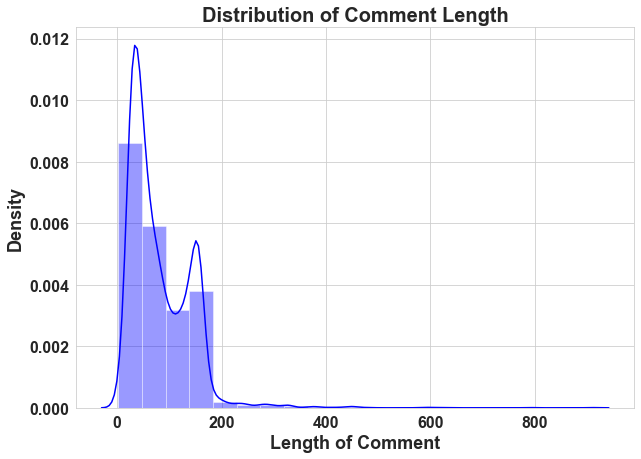

In [31]:
#Distribution of comments length
sns.set_style('whitegrid')
plt.figure(figsize=(10,7))
comment_len = dt.Input.str.len()
sns.distplot(comment_len, bins=20, color = 'blue')

plt.title("Distribution of Comment Length", fontsize=20, fontweight='bold')
plt.ylabel('Density', fontsize=18,fontweight='bold')
plt.xlabel('Length of Comment', fontsize=18,fontweight='bold')
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.show()

In [32]:
ham_desc=dt[dt["Output"]=="ham"]["Input"].describe()
spam_desc=dt[dt["Output"]=="spam"]["Input"].describe()

print("Ham Messege Length Description:\n",ham_desc)
print("************************************")
print("Spam Message Length Description:\n",spam_desc)

Ham Messege Length Description:
 count                       4825
unique                      4516
top       Sorry, I'll call later
freq                          30
Name: Input, dtype: object
************************************
Spam Message Length Description:
 count                                                   747
unique                                                  653
top       Please call our customer service representativ...
freq                                                      4
Name: Input, dtype: object


# Data Cleaning

In [33]:
#Defining the stop words
stop_words = stopwords.words('english')

#Defining the lemmatizer
lemmatizer = WordNetLemmatizer()

In [34]:
#Replacing '\n' in comment_text
dt['Input'] = dt['Input'].replace('\n',' ')

In [35]:
#Function Definition for using regex operations and other text preprocessing for getting cleaned texts
def clean_comments(text):
    
    #convert to lower case
    lowered_text = text.lower()
    
    #Replacing email addresses with 'emailaddress'
    text = re.sub(r'^.+@[^\.].*\.[a-z]{2,}$', 'emailaddress', lowered_text)
    
    #Replace URLs with 'webaddress'
    text = re.sub(r'http\S+', 'webaddress', text)
    
    #Removing numbers
    text = re.sub(r'[0-9]', " ", text)
    
    #Removing the HTML tags
    text = re.sub(r"<.*?>", " ", text)
    
    #Removing Punctuations
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'\_',' ',text)
    
    #Removing all the non-ascii characters 
    clean_words = re.sub(r'[^\x00-\x7f]',r'', text)
    
    #Removing the unwanted white spaces
    text = " ".join(text.split()) 
    
    #Splitting data into words
    tokenized_text = word_tokenize(text)
    
    #Removing remaining tokens that are not alphabetic, Removing stop words and Lemmatizing the text
    removed_stop_text = [lemmatizer.lemmatize(word) for word in tokenized_text if word not in stop_words if word.isalpha()]
   
    return " ".join(removed_stop_text)

In [36]:
# Calling the above function for the column comment_text in training dataset to replace original with cleaned text
dt['Input'] = dt['Input'].apply(clean_comments)
dt['Input'].head()

0    go jurong point crazy available bugis n great ...
1                              ok lar joking wif u oni
2    free entry wkly comp win fa cup final tkts st ...
3                  u dun say early hor u c already say
4                  nah think go usf life around though
Name: Input, dtype: object

In [37]:
# Creating a column 'length_before_cleaning' in training dataset
# It represents the length of the each comment respectively in a column 'comment_text' 
dt['length_after_cleaning'] = dt['Input'].map(lambda comment_text: len(comment_text))
dt

,Input,Output,length_before_cleaning,length_after_cleaning
0,go jurong point crazy available bugis n great ...,ham,111,82
1,ok lar joking wif u oni,ham,29,23
2,free entry wkly comp win fa cup final tkts st ...,spam,155,101
3,u dun say early hor u c already say,ham,49,35
4,nah think go usf life around though,ham,61,35
...,...,...,...,...
5567,nd time tried contact u u pound prize claim ea...,spam,160,83
5568,b going esplanade fr home,ham,37,25
5569,pity mood suggestion,ham,57,20
5570,guy bitching acted like interested buying some...,ham,125,78


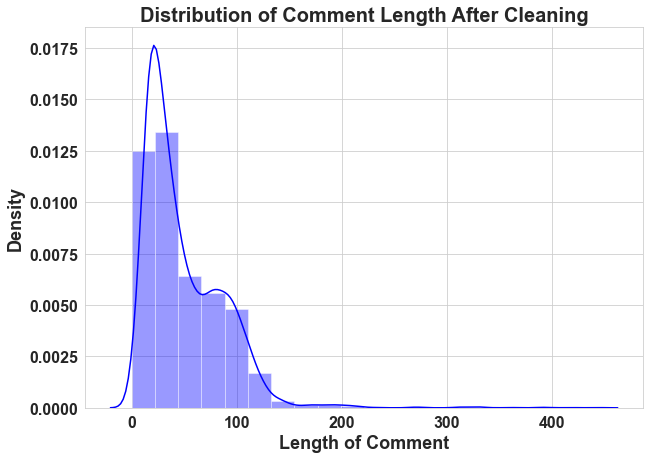

In [38]:
#Distribution of comments length
sns.set_style('whitegrid')
plt.figure(figsize=(10,7))
comment_len = dt.Input.str.len()
sns.distplot(comment_len, bins=20, color = 'blue')

plt.title("Distribution of Comment Length After Cleaning", fontsize=20, fontweight='bold')
plt.ylabel('Density', fontsize=18,fontweight='bold')
plt.xlabel('Length of Comment', fontsize=18,fontweight='bold')
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.show()

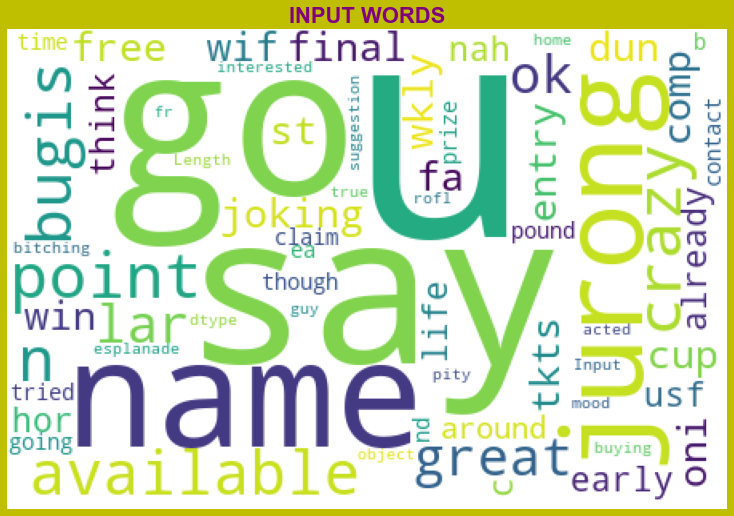

In [39]:
wordcloud=WordCloud(height=300,width=450,max_words=300,background_color="white").generate(str(dt['Input']))
plt.figure(figsize=(10,10),facecolor='y')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='INPUT WORDS',fontdict={'fontsize':22, 'fontweight':'bold', 'color':'purple'})
plt.show()

In [40]:
# Converting the features into number vectors
tf_vec = TfidfVectorizer(max_features = 2000, stop_words='english')

In [41]:
# Let's Separate the input and output variables represented by X and y respectively in train data and convert them
X = tf_vec.fit_transform(dt['Input']).toarray()

In [42]:
y=dt['Output'].map({'ham':'0','spam':'1'})

In [43]:
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Output, Length: 5572, dtype: object

In [67]:
#Upsmapling have to be performed to remove the biases
from imblearn.over_sampling import SMOTE

In [68]:
osmp=SMOTE(0.75)

In [69]:
x_train,x_test,y_train, y_test=train_test_split(X,y)

In [70]:
X_train_ns,y_train_ns=osmp.fit_resample(x_train,y_train)

In [48]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import hamming_loss, log_loss

In [49]:
import timeit, sys
import tqdm.notebook as tqdm

In [50]:
x_train,x_test,y_train, y_test=train_test_split(X_train_ns,y_train_ns,test_size=.20, random_state=42)
re=BernoulliNB()
re.fit(x_train, y_train)
predtrain=re.predict(x_train)
predtest=re.predict(x_test)

re.fit(x_train,y_train)
        

predict_y = re.predict(x_test)
        
ham_loss = hamming_loss(y_test,predict_y)
sys.stdout.write(f"\n\tHamming Loss  : {ham_loss}")
                
ac_score = accuracy_score(y_test,predict_y)
sys.stdout.write(f"\n\tAccuracy Score: {ac_score}")
        
cl_report = classification_report(y_test,predict_y)
sys.stdout.write(f"\n{cl_report}")


	Hamming Loss  : 0.01971608832807571
	Accuracy Score: 0.9802839116719243
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       724
           1       1.00      0.95      0.98       544

    accuracy                           0.98      1268
   macro avg       0.98      0.98      0.98      1268
weighted avg       0.98      0.98      0.98      1268


In [51]:
 from sklearn.neural_network import MLPClassifier

In [52]:
x_train,x_test,y_train, y_test=train_test_split(X_train_ns,y_train_ns,test_size=.20, random_state=42)
re=MLPClassifier()
re.fit(x_train, y_train)
predtrain=re.predict(x_train)
predtest=re.predict(x_test)

re.fit(x_train,y_train)
        

predict_y = re.predict(x_test)
        
ham_loss = hamming_loss(y_test,predict_y)
sys.stdout.write(f"\n\tHamming Loss  : {ham_loss}")
                
ac_score = accuracy_score(y_test,predict_y)
sys.stdout.write(f"\n\tAccuracy Score: {ac_score}")
        
cl_report = classification_report(y_test,predict_y)
sys.stdout.write(f"\n{cl_report}")


	Hamming Loss  : 0.03785488958990536
	Accuracy Score: 0.9621451104100947
              precision    recall  f1-score   support

           0       0.99      0.94      0.97       724
           1       0.93      0.99      0.96       544

    accuracy                           0.96      1268
   macro avg       0.96      0.97      0.96      1268
weighted avg       0.96      0.96      0.96      1268


In [53]:
x_train,x_test,y_train, y_test=train_test_split(X_train_ns,y_train_ns,test_size=.20, random_state=49)
re=MLPClassifier()
re.fit(x_train, y_train)
predtrain=re.predict(x_train)
predtest=re.predict(x_test)

re.fit(x_train,y_train)
        

predict_y = re.predict(x_test)
        
ham_loss = hamming_loss(y_test,predict_y)
sys.stdout.write(f"\n\tHamming Loss  : {ham_loss}")
                
ac_score = accuracy_score(y_test,predict_y)
sys.stdout.write(f"\n\tAccuracy Score: {ac_score}")
        
cl_report = classification_report(y_test,predict_y)
sys.stdout.write(f"\n{cl_report}")


	Hamming Loss  : 0.03391167192429022
	Accuracy Score: 0.9660883280757098
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       710
           1       0.93      1.00      0.96       558

    accuracy                           0.97      1268
   macro avg       0.96      0.97      0.97      1268
weighted avg       0.97      0.97      0.97      1268


In [77]:
from sklearn.linear_model import SGDClassifier

In [79]:
x_train,x_test,y_train, y_test=train_test_split(X_train_ns,y_train_ns,test_size=.20, random_state=32)
re=SGDClassifier()
re.fit(x_train, y_train)
predtrain=re.predict(x_train)
predtest=re.predict(x_test)

re.fit(x_train,y_train)
        

predict_y = re.predict(x_test)
        
ham_loss = hamming_loss(y_test,predict_y)
sys.stdout.write(f"\n\tHamming Loss  : {ham_loss}")
                
ac_score = accuracy_score(y_test,predict_y)
sys.stdout.write(f"\n\tAccuracy Score: {ac_score}")
        
cl_report = classification_report(y_test,predict_y)
sys.stdout.write(f"\n{cl_report}")


	Hamming Loss  : 0.0315955766192733
	Accuracy Score: 0.9684044233807267
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       725
           1       0.96      0.97      0.96       541

    accuracy                           0.97      1266
   macro avg       0.97      0.97      0.97      1266
weighted avg       0.97      0.97      0.97      1266


In [81]:
from sklearn.naive_bayes import MultinomialNB

In [82]:
x_train,x_test,y_train, y_test=train_test_split(X_train_ns,y_train_ns,test_size=.20, random_state=32)
re=MultinomialNB()
re.fit(x_train, y_train)
predtrain=re.predict(x_train)
predtest=re.predict(x_test)

re.fit(x_train,y_train)
        

predict_y = re.predict(x_test)
        
ham_loss = hamming_loss(y_test,predict_y)
sys.stdout.write(f"\n\tHamming Loss  : {ham_loss}")
                
ac_score = accuracy_score(y_test,predict_y)
sys.stdout.write(f"\n\tAccuracy Score: {ac_score}")
        
cl_report = classification_report(y_test,predict_y)
sys.stdout.write(f"\n{cl_report}")


	Hamming Loss  : 0.0339652448657188
	Accuracy Score: 0.9660347551342812
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       725
           1       0.96      0.96      0.96       541

    accuracy                           0.97      1266
   macro avg       0.97      0.96      0.97      1266
weighted avg       0.97      0.97      0.97      1266


# Undersampling

In [46]:
from imblearn.under_sampling import NearMiss

In [47]:
osmp=NearMiss(0.75)

In [48]:
x_train,x_test,y_train, y_test=train_test_split(X,y)

In [49]:
X_train_ns,y_train_ns=osmp.fit_resample(x_train,y_train)

In [50]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import hamming_loss, log_loss

In [52]:
import timeit, sys
import tqdm.notebook as tqdm

In [53]:
x_train,x_test,y_train, y_test=train_test_split(X_train_ns,y_train_ns,test_size=.20, random_state=42)
re=BernoulliNB()
re.fit(x_train, y_train)
predtrain=re.predict(x_train)
predtest=re.predict(x_test)

re.fit(x_train,y_train)
        

predict_y = re.predict(x_test)
        
ham_loss = hamming_loss(y_test,predict_y)
sys.stdout.write(f"\n\tHamming Loss  : {ham_loss}")
                
ac_score = accuracy_score(y_test,predict_y)
sys.stdout.write(f"\n\tAccuracy Score: {ac_score}")
        
cl_report = classification_report(y_test,predict_y)
sys.stdout.write(f"\n{cl_report}")


	Hamming Loss  : 0.056818181818181816
	Accuracy Score: 0.9431818181818182
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       150
           1       1.00      0.87      0.93       114

    accuracy                           0.94       264
   macro avg       0.95      0.93      0.94       264
weighted avg       0.95      0.94      0.94       264


In [54]:
from sklearn.neural_network import MLPClassifier

In [55]:
x_train,x_test,y_train, y_test=train_test_split(X_train_ns,y_train_ns,test_size=.20, random_state=42)
re=MLPClassifier()
re.fit(x_train, y_train)
predtrain=re.predict(x_train)
predtest=re.predict(x_test)

re.fit(x_train,y_train)
        

predict_y = re.predict(x_test)
        
ham_loss = hamming_loss(y_test,predict_y)
sys.stdout.write(f"\n\tHamming Loss  : {ham_loss}")
                
ac_score = accuracy_score(y_test,predict_y)
sys.stdout.write(f"\n\tAccuracy Score: {ac_score}")
        
cl_report = classification_report(y_test,predict_y)
sys.stdout.write(f"\n{cl_report}")


	Hamming Loss  : 0.06439393939393939
	Accuracy Score: 0.9356060606060606
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       150
           1       0.91      0.95      0.93       114

    accuracy                           0.94       264
   macro avg       0.93      0.94      0.93       264
weighted avg       0.94      0.94      0.94       264


In [56]:
x_train,x_test,y_train, y_test=train_test_split(X_train_ns,y_train_ns,test_size=.20, random_state=49)
re=MLPClassifier()
re.fit(x_train, y_train)
predtrain=re.predict(x_train)
predtest=re.predict(x_test)

re.fit(x_train,y_train)
        

predict_y = re.predict(x_test)
        
ham_loss = hamming_loss(y_test,predict_y)
sys.stdout.write(f"\n\tHamming Loss  : {ham_loss}")
                
ac_score = accuracy_score(y_test,predict_y)
sys.stdout.write(f"\n\tAccuracy Score: {ac_score}")
        
cl_report = classification_report(y_test,predict_y)
sys.stdout.write(f"\n{cl_report}")


	Hamming Loss  : 0.05303030303030303
	Accuracy Score: 0.946969696969697
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       150
           1       0.96      0.91      0.94       114

    accuracy                           0.95       264
   macro avg       0.95      0.94      0.95       264
weighted avg       0.95      0.95      0.95       264


In [57]:
from sklearn.linear_model import SGDClassifier

In [58]:
x_train,x_test,y_train, y_test=train_test_split(X_train_ns,y_train_ns,test_size=.20, random_state=32)
re=SGDClassifier()
re.fit(x_train, y_train)
predtrain=re.predict(x_train)
predtest=re.predict(x_test)

re.fit(x_train,y_train)
        

predict_y = re.predict(x_test)
        
ham_loss = hamming_loss(y_test,predict_y)
sys.stdout.write(f"\n\tHamming Loss  : {ham_loss}")
                
ac_score = accuracy_score(y_test,predict_y)
sys.stdout.write(f"\n\tAccuracy Score: {ac_score}")
        
cl_report = classification_report(y_test,predict_y)
sys.stdout.write(f"\n{cl_report}")


	Hamming Loss  : 0.045454545454545456
	Accuracy Score: 0.9545454545454546
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       160
           1       0.96      0.92      0.94       104

    accuracy                           0.95       264
   macro avg       0.96      0.95      0.95       264
weighted avg       0.95      0.95      0.95       264


In [67]:
from sklearn.naive_bayes import MultinomialNB

In [70]:
x_train,x_test,y_train, y_test=train_test_split(X_train_ns,y_train_ns,test_size=.20, random_state=32)
re=MultinomialNB()
re.fit(x_train, y_train)
predtrain=re.predict(x_train)
predtest=re.predict(x_test)

re.fit(x_train,y_train)
        

predict_y = re.predict(x_test)
        
ham_loss = hamming_loss(y_test,predict_y)
sys.stdout.write(f"\n\tHamming Loss  : {ham_loss}")
                
ac_score = accuracy_score(y_test,predict_y)
sys.stdout.write(f"\n\tAccuracy Score: {ac_score}")
        
cl_report = classification_report(y_test,predict_y)
sys.stdout.write(f"\n{cl_report}")


	Hamming Loss  : 0.07575757575757576
	Accuracy Score: 0.9242424242424242
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       160
           1       0.93      0.88      0.90       104

    accuracy                           0.92       264
   macro avg       0.93      0.92      0.92       264
weighted avg       0.92      0.92      0.92       264


# Conclusion

The data was taken and cleaned. The visualization was performed and tokenized for the model. During oversampling the model best model evalution done as Hamming Loss: 0.01971608832807571 and Accuracy Score:0.9802839116719243 from sklearn.naive_bayes of BernoulliNB. During undersampling the model evalution done as Hamming Loss:0.045454545454545456 and Accuracy Score: 0.9545454545454546 of from sklearn.neural_network import SGDClassifier.